This recreation comes from [2023 Week 15 | Marginal Histograms](https://workout-wednesday.com/crma_2023-w15/).

In [1]:
import pandas as pd
import numpy as np
import panel as pn

pn.extension()

In [2]:
file = './datasets/WoW-2023-15-Marginal_Histograms.csv'
data = pd.read_csv(file)
data.head(10)

,Name,Stage Order,StageName,Amount
0,Catherine Brown,2,Qualification,1821769
1,Kelly Frazier,6,Perception Analysis,278337
2,Julie Chavez,1,Prospecting,2217555
3,Laura Palmer,1,Prospecting,5198280
4,Kelly Frazier,2,Qualification,4447300
5,Eric Sanchez,2,Qualification,413101
6,Bruce Kennedy,6,Perception Analysis,7976750
7,Laura Garza,4,Value Proposition,3209120
8,Irene Kelley,3,Needs Analysis,11169590
9,Johnny Green,2,Qualification,3651695


In [3]:
data_grouped = data.groupby(by=['Name','Stage Order']).first()
data_grouped.head(10)

StageName   Amount
Name            Stage Order                               
Bruce Kennedy   1                     Prospecting   224800
                2                   Qualification   991350
                3                  Needs Analysis  9222850
                4               Value Proposition   510465
                6             Perception Analysis  7976750
                7            Proposal/Price Quote        0
                8              Negotiation/Review  2739360
Catherine Brown 1                     Prospecting  1666850
                2                   Qualification  1821769
                3                  Needs Analysis   732880

In [4]:
Stage_selected = [1,2,3,4,6,7,8]
X = data_grouped.loc['Bruce Kennedy'].loc[Stage_selected, 'StageName']
Y = np.unique(data_grouped.index.get_level_values(0))
Z = data_grouped.loc[(slice(None), Stage_selected), 'Amount'].values.reshape(len(Y), len(X))

data_selected = data_grouped.loc[(slice(None), Stage_selected), :]
data_at_right = data_selected.groupby(level=0).agg({'StageName': 'first', 'Amount': 'sum'})
data_at_top = data_selected.groupby(level=1).agg({'StageName': 'first', 'Amount': 'sum'})

total = data_grouped.sum()['Amount']

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def trunc_cmap(cmap, minval=0.0, maxval=1.0, n=100):
    cmapf = plt.get_cmap(cmap)
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        "{n}/{a:.2f}-{b:.2f}".format(n=cmapf.name, a=minval, b=maxval),
        cmapf(np.linspace(minval, maxval, n)),
    )
    return new_cmap

cmap = trunc_cmap('Blues', 0.3, 0.9)

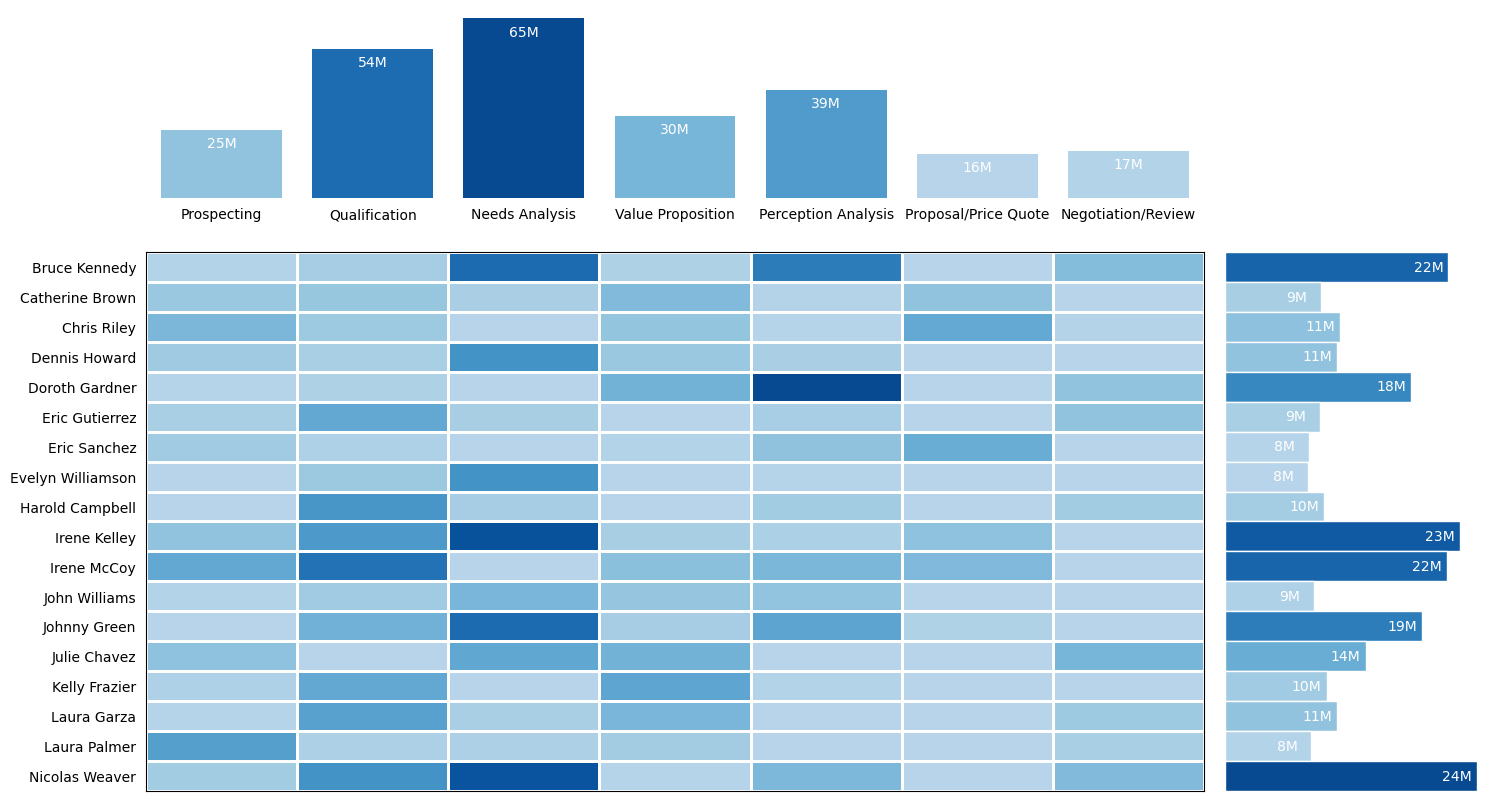

In [6]:
# Manipulate the data

# Create a Figure, which doesn't have to be square.
fig = plt.figure(figsize=(15, 8), layout='constrained')
# Create the main axes, leaving 25% of the figure space at the top and on the
# right to position marginals.
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
# # The main axes' aspect can be fixed.
# ax.set(aspect=0.2)
# Create marginal axes, which have 45% of the size of the main axes.  Note that
# the inset axes are positioned *outside* (on the right and the top) of the
# main axes, by specifying axes coordinates greater than 1.  Axes coordinates
# less than 0 would likewise specify positions on the left and the bottom of
# the main axes.
ax_histx = ax.inset_axes([0, 1.1, 1, 0.35], sharex=ax)
ax_histy = ax.inset_axes([1.02, 0, 0.25, 1], sharey=ax)

ax.pcolormesh(X, Y, Z, cmap=cmap, vmin=0, edgecolor='w', linewidth=1)
ax.invert_yaxis()
ax.tick_params(bottom=False, left=False, labelbottom=False)

# Map bar values into the cmap
def map_color(values, cmap):
    vmin, vmax = np.min(values), np.max(values)
    norm = mcolors.Normalize(vmin, vmax)
    colors = [cmap(norm(i)) for i in values]
    return colors

barx = ax_histx.bar(data_at_top['StageName'], data_at_top['Amount'], color=map_color(data_at_top['Amount'], cmap))
ax_histx.bar_label(barx, fmt=lambda x: '%dM' % np.round(x/1000000), padding=-15, color='w')
ax_histx.spines[:].set_visible(False)
ax_histx.tick_params(bottom=False, left=False, labelleft=False)

bary = ax_histy.barh(data_at_right.index, data_at_right['Amount'], height=1, 
                     edgecolor='w', color=map_color(data_at_right['Amount'], cmap))
ax_histy.bar_label(bary, fmt=lambda x: '%dM' % np.round(x/1000000), padding=-25, color='w')
ax_histy.spines[:].set_visible(False)
ax_histy.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)

plt.show()

Column
    [0] Row
        [0] Markdown(str)
        [1] CheckBoxGroup(inline=True, name='Stage Name', options={'Prospecting': 1, ...}, value=[1, 2, 3, 4, 6, 7, 8])
    [1] ParamFunction(function, _pane=Matplotlib)
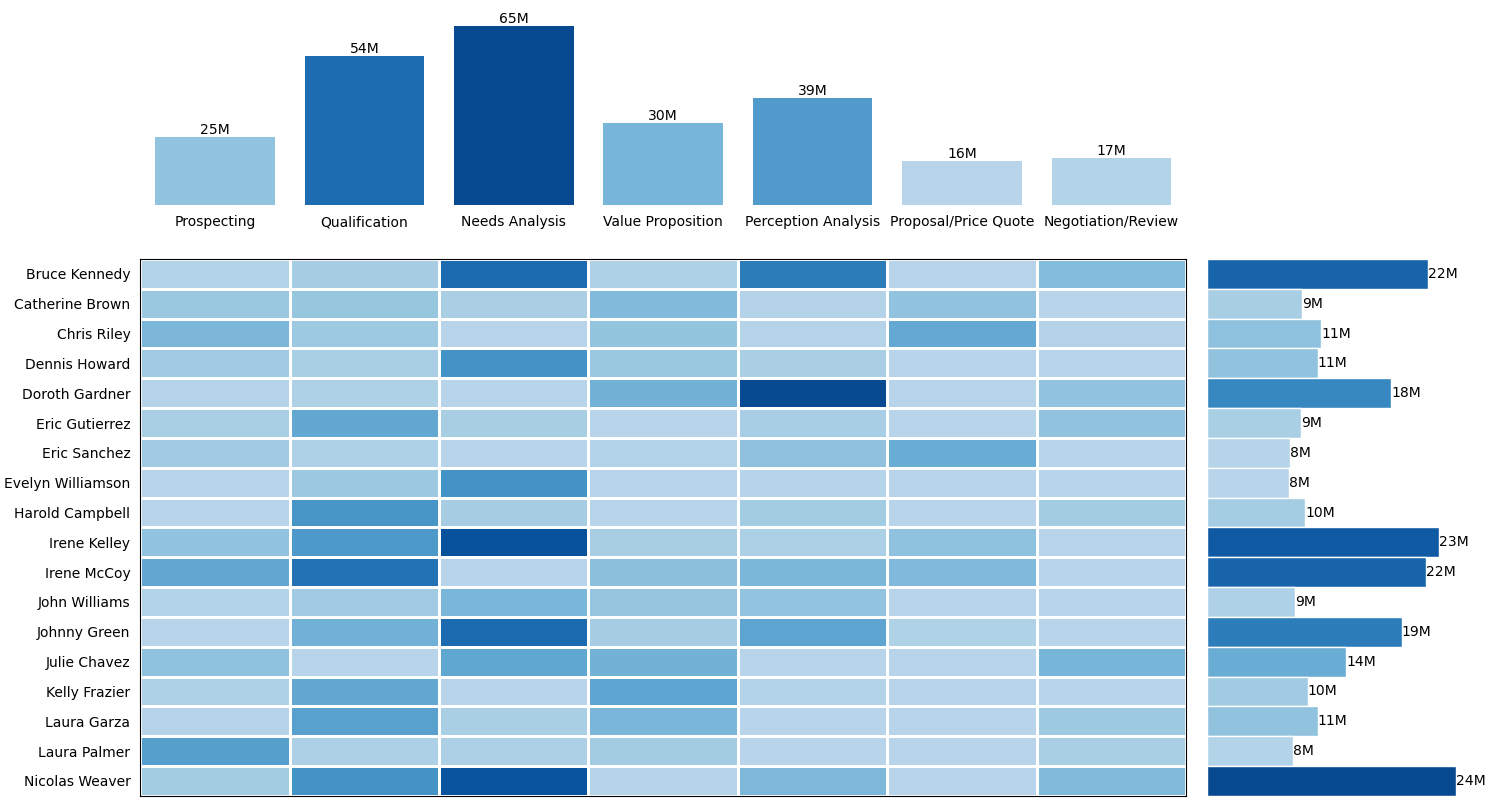

In [118]:
import matplotlib.figure as mfig

def plotf(stages):
    X = data_grouped.loc['Bruce Kennedy'].loc[stages, 'StageName']
    Y = np.unique(data_grouped.index.get_level_values(0))
    Z = data_grouped.loc[(slice(None), stages), 'Amount'].values.reshape(len(Y), len(X))

    data_selected = data_grouped.loc[(slice(None), stages), :]
    data_at_right = data_selected.groupby(level=0).agg({'StageName': 'first', 'Amount': 'sum'})
    data_at_top = data_selected.groupby(level=1).agg({'StageName': 'first', 'Amount': 'sum'})

    total = data_grouped.sum()['Amount']
    
    fig = mfig.Figure(figsize=(15, 8), layout='constrained')
    ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
    ax_histx = ax.inset_axes([0, 1.1, 1, 0.35], sharex=ax)
    ax_histy = ax.inset_axes([1.02, 0, 0.25, 1], sharey=ax)
    
    if stages:
        ax.pcolormesh(X, Y, Z, cmap=cmap, vmin=0, edgecolor='w', linewidth=1)
    else:
        ax.clear()
    ax.invert_yaxis()
    ax.tick_params(bottom=False, left=False, labelbottom=False)
    
    if stages:
        barx = ax_histx.bar(data_at_top['StageName'], data_at_top['Amount'], color=map_color(data_at_top['Amount'], cmap))
        ax_histx.bar_label(barx, fmt=lambda x: '%dM' % np.round(x/1000000) if (x / 1000000 >= 1) else '%dK' % np.round(x/1000))
    else:
        ax_histx.clear()
    ax_histx.spines[:].set_visible(False)
    ax_histx.tick_params(bottom=False, left=False, labelleft=False)
    
    if stages:
        bary = ax_histy.barh(data_at_right.index, data_at_right['Amount'], height=1, 
                             edgecolor='w', color=map_color(data_at_right['Amount'], cmap))
        ax_histy.bar_label(bary, fmt=lambda x: '%dM' % np.round(x/1000000) if (x / 1000000 >= 1) else '%dK' % np.round(x/1000))
    else:
        ax_histy.clear()
    ax_histy.spines[:].set_visible(False)
    ax_histy.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
    
    return fig

stages_check = pn.widgets.CheckBoxGroup(name='Stage Name', inline=True,
                                        options={'Prospecting': 1, 'Qualification': 2, 'Needs Analysis': 3, 'Value Proposition': 4,
                                                 'Perception Analysis': 6, 'Proposal/Price Quote': 7, 'Negotiation/Review': 8}, 
                                        value=[1,2,3,4,6,7,8]
                                     )
iplot = pn.bind(plotf, stages=stages_check)
pn.Column(pn.Row('Stage Name: ', stages_check), iplot).servable()